In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data csv
data = pd.read_csv('./system_of_record_timestamps.csv')

In [3]:
# 1. Format primary timestamp to date time column
# comment: Primary_timestamp is mixed with various time format, 
# the order of month and day is also unordered at some rows

data['pt'] = pd.to_datetime(data['Primary_Timestamp'], format='mixed', utc=True)

In [4]:
# 2. Format Tertiary_Timestamp to approriate time string %m-%d-%Y (eg. (10-01-2024))
data['tt'] = data['pt'].dt.strftime('%m-%d-%Y')

In [5]:
# 3. Add new datetime columns for easier analysis. columns dtype: object
data['year'] = data['tt'].apply(lambda x: x.split('-')[2])
data['month'] = data['tt'].apply(lambda x: x.split('-')[0])
data['day'] = data['tt'].apply(lambda x: x.split('-')[1])

In [6]:
# 4. Fix uncorrected converted Primary_Timestamp (pt)
# comment: "this dataset should range from Oct-Dec 2024 and Jan 2025,
# but there are some inconsistent in Primary_timestamp, 
# some rows has reversed order of month and day "

# select data that in 2024 and not in month 10,11,12. Make a temp dataframe
temp = data.loc[
    (~data['month'].isin(['11', '12', '10'])) &
    (data['year'] != '2025')
]

# swap day and month of that row
temp.loc[:, 'pt'] = temp['pt'].apply(lambda x: x.replace(day=x.month, month=x.day))

# change original data according to temp
data.loc[
    (~data['month'].isin(['11', '12', '10'])) &
    (data['year'] != '2025')
] = temp

In [7]:
# 5.re-transform the Tertiary_Timestamp (tt) and other columns
data['tt'] = data['pt'].dt.strftime('%m-%d-%Y')
data['year'] = data['tt'].apply(lambda x: x.split('-')[2])
data['month'] = data['tt'].apply(lambda x: x.split('-')[0])
data['day'] = data['tt'].apply(lambda x: x.split('-')[1])

In [8]:
# 6.format the Secondary_Timestamp
# comment: the secondary timestamp is calculated by
# how many days it been from the orignal time (Nov 6, 2024)
data['days'] = data['tt'].apply(lambda x : (pd.Timestamp(x, tz='UTC') - pd.Timestamp('2024-11-06T00:00:00Z', tz='UTC')).days)

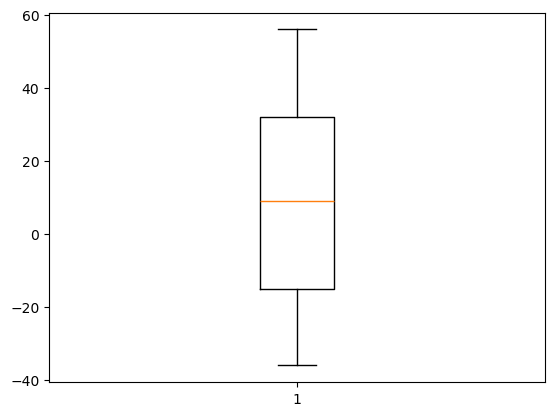

In [9]:
# check values of days to spot outliers
plt.boxplot(data['days']);

In [10]:
# 7.Drop duplicates
# comment: there're some duplicates in the data
# that effect the plot. Drop duplicated rows after inspect and
# ensure that the Event_count is the identical for date-duplicated rows

data.drop_duplicates(subset='pt', inplace=True)

Text(0, 0.5, 'Event Count')

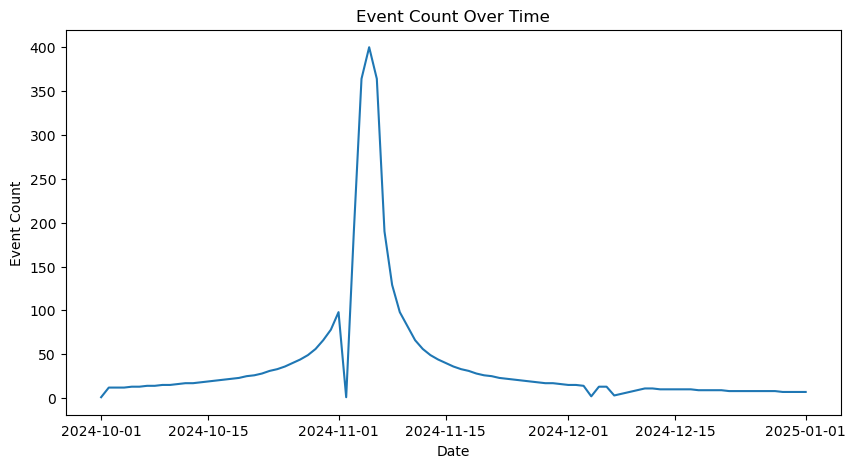

In [23]:
# 8.Plot the event count over time to spot unusual activities
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['pt'], data['Event_Count'])
ax.set_title('Event Count Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Event Count')